Data Analysis Practice II-E2 

# Final Project

<br>
⚠️   <span style="color:red">**NOTE!** &nbsp; &nbsp;  Your IPYNB file must run without errors</span>

<br>

<center>(To check for errors in Jupyter, use:   <b>Kernel</b>.. <b>Restart & Run All</b>)</center>

___

* **Name**:  <span style="color:blue">Chawit Kaewnuratchadasorn</span>
* **Student number**:  <span style="color:blue">1023312299</span>
* **Project theme**:  <span style="color:blue">Alcoholism</span>
* **Project purpose**:  <span style="color:blue">The programme will predict the quality of red wine according to its features (eg. pH, density, percent of alcohol).</span>

___

## Dataset description

**Dataset source(s)**

<span style="color:blue">https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/</span>

**Overview**

<span style="color:blue">The redwine dataset consists of 12 columns. The first 11 columns are chemical properties of redwine: fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol. The last column is the quality of red wine. There are 1599 red wines in the dataset.</span>


**Variables**

<span style="color:blue">**Independent variables:**</span>
* <span style="color:blue">fixed acidity</span>
* <span style="color:blue">volatile acidity</span>
* <span style="color:blue">citric acid</span>
* <span style="color:blue">residual sugar</span>
* <span style="color:blue">chlorides</span>
* <span style="color:blue">free sulfur dioxide</span>
* <span style="color:blue">total sulfur dioxide</span>
* <span style="color:blue">density</span>
* <span style="color:blue">pH</span>
* <span style="color:blue">sulphates</span>
* <span style="color:blue">alcohol</span>

<span style="color:blue">**Dependent variables:**</span>
* <span style="color:blue">quality of red wine</span>

In [6]:
# Lists of library and functions used in the programme

'''
Lists of library used in the programme
'''
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
%matplotlib inline
import os

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier   


'''
The function below is used for the 
analysis part to select each column
'''

def data_preparation_for_relationship(dataset,m):
    r = []
    for i in range(len(dataset)):
        r.append(dataset[i][m])
    return r

___

## Data parsing using Python

**Python functions used**

* `np.loadtxt`
* `os.path.abspath`
* `os.path.join`

**Overview**

<span style="color:blue">{Summarize your data parsing here (approximately 50 to 100 words)}</span>

* <span style="color:blue">I used `os.path.abspath` to get path to a directory that contains red-wine file (**final_project**).</span>
* <span style="color:blue">I used `os.path.os` to get filename (**winequality-red.csv**)."</span>
* <span style="color:blue">I used `np.loadtxt` to obtain data in array (**winequality-red.csv**)."</span>

**Parsing difficulties**

* <span style="color:blue">The difficult part is `skiprows` part in the `np.loadtxt` to skip header row</span>




In [7]:
dirname = os.path.abspath('./')
filename1 = os.path.join(dirname,'winequality-red.csv')

redwine_data = np.loadtxt(filename1,delimiter=';',comments='#',skiprows=1)

___

## Analysis Methods

<span style="color:blue">Two analysis methods are used to analyse eac property of wine with the quality of wine. Then data with p &lt; 0.05 will be selected</span>

* <span style="color:blue">Regression</span>
* <span style="color:blue">Paired t tests</span>


___

## Results

### Dataset description

<span style="color:blue">The histrogram is plotted by number of wine with each quality</span>

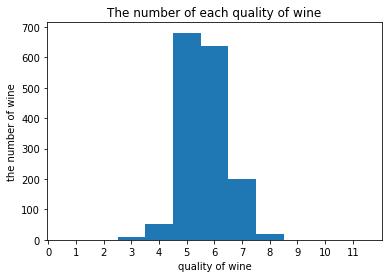

In [8]:
# histrogram
histrogram = data_preparation_for_relationship(redwine_data,11)
x = [i+0.5 for i in range(0,12)]
tick = [i for i in range(0,12)]

plt.figure()
plt.hist(histrogram,bins = x)
plt.xticks(tick)
plt.xlabel("quality of wine")
plt.ylabel("the number of wine")
plt.title("The number of each quality of wine")

redwine = pd.read_csv('winequality-red.csv',delimiter = ';')
# display(redwine.head())

header = []
for col in redwine.columns:
    header.append(col)
    
plt.savefig("figure1.png")

### Hypothesis testing results

<span style="color:blue">Regression and Paired t test used to analyse the p value of each property and quality</span>


In [9]:
# Paired t test
print("Paired t test")
print("==============================================")

for i in range(0, len(redwine_data[1])-1):
    x = data_preparation_for_relationship(redwine_data,i)
    t,p = stats.ttest_rel(x,data_preparation_for_relationship(redwine_data,11))
    compare = header[i]
    print('P value of',compare, 'and quality is ')
    print(p)
    if p < 0.05:
        print("Hypothesis is rejected. SIGNIFICANT !")
    else: print("NOT SIGNIFICANT !")
    print("----------------------------------------------")
print(" ")

# Regression
print("Regression")
print("==============================================")
for i in range(0,len(redwine_data[1])-1):
    x = data_preparation_for_relationship(redwine_data,i)
    linre = stats.linregress(x,data_preparation_for_relationship(redwine_data,11))
    compare = header[i]
    print('P value of',compare, 'and quality is ')
    print(linre.pvalue)
    if linre.pvalue < 0.05:
        print("Hypothesis is rejected. SIGNIFICANT !")
    else: print("NOT SIGNIFICANT !")
    print("----------------------------------------------")

Paired t test
P value of fixed acidity and quality is 
0.0
Hypothesis is rejected. SIGNIFICANT !
----------------------------------------------
P value of volatile acidity and quality is 
0.0
Hypothesis is rejected. SIGNIFICANT !
----------------------------------------------
P value of citric acid and quality is 
0.0
Hypothesis is rejected. SIGNIFICANT !
----------------------------------------------
P value of residual sugar and quality is 
0.0
Hypothesis is rejected. SIGNIFICANT !
----------------------------------------------
P value of chlorides and quality is 
0.0
Hypothesis is rejected. SIGNIFICANT !
----------------------------------------------
P value of free sulfur dioxide and quality is 
3.0434756940062495e-233
Hypothesis is rejected. SIGNIFICANT !
----------------------------------------------
P value of total sulfur dioxide and quality is 
0.0
Hypothesis is rejected. SIGNIFICANT !
----------------------------------------------
P value of density and quality is 
0.0
Hypoth

### Analysis

<span style="color:blue">
 
From two types of data analysis (regression and paired t test), we can conclude:

1. Regression showed that every variable has a statistical significance on the label because p value for all variables is less than 0.05.

2. Paired t test showed that only one variable, namely residual sugar, has less statistical significance compared with other variables because the p value for residual sugar is 0.583 which is far more than 0.05.

From these analysis, we eliminate the column "residual sugar" or column 4 (column 3 in the numpy array) in the machine learning to get higher accuracy.
 
</span>


### Machine learning

<span style="color:blue">Two machine learning methods which are K-Nearest Neighbors and Decision Tree are used to learn the data and predict. The data are splitted into train set and test set (each with values and labels) by a library `train_test_split`. Variable a is for selecting the columes from analysing part to reduce variables used in the programme</span>

In [10]:
a = [0,1,2,4,5,6,7,8,9,10]

x_train, x_test, y_train, y_test = train_test_split(redwine_data[:,a], redwine_data[:,11], test_size = 0.2, random_state = 42)

knn    = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
print("knn",knn.score(x_test, y_test))
    
tree = DecisionTreeClassifier(random_state=1) 
tree.fit(x_train, y_train) 
print("tree",tree.score(x_test, y_test))

knn 0.44375
tree 0.5875


___

## Summary

* <span style="color:blue">Paired t test found that correlations between each property and quality are significant (p &lt; 0.05).</span>
* <span style="color:blue">Regression found that correlation between sugar and quality is not significant (p = 0.58) .</span>
* <span style="color:blue">K-Nearest Neighbors showed the accuracy of predicting wine quality 44%</span>
* <span style="color:blue">Decision Tree showed the accuracy of predicting wine quality 58%</span>

<span style="color:blue">This project found that decision tree is proved for a better machine learning method to predict red wine quality from its chemical properties.</span>